In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
import pickle
from scipy.signal import savgol_filter

In [4]:
font = {"size":20}
matplotlib.rc("font", **font)

## Калибровка потока 

In [11]:
with open("fitting_data/xmons-first-try-2nd-res-anticrossings.pkl", "rb") as f:
    data3 = pickle.load(f)

(5.7, 5.8)

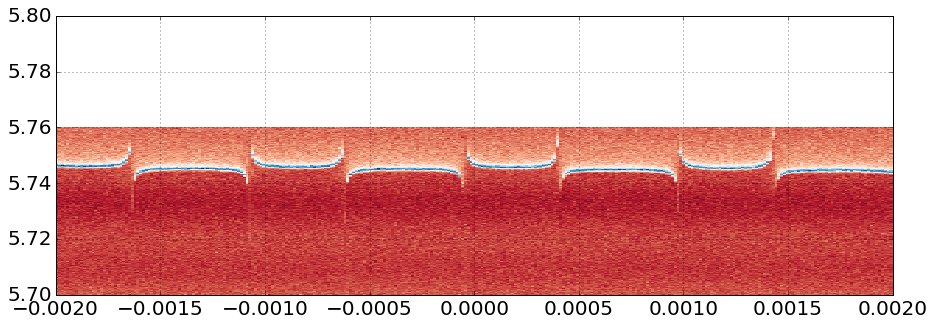

In [12]:
plt.pcolormesh(data3[1][0], data3[1][1]/1e9, data3[1][2].T, cmap='RdBu_r')
plt.gcf().set_size_inches(15,5)
gca().axis('tight')
plt.grid()
plt.ylim(5.7,5.8)

In [13]:
data3[1][1][250]/1e9

5.7501672240000001

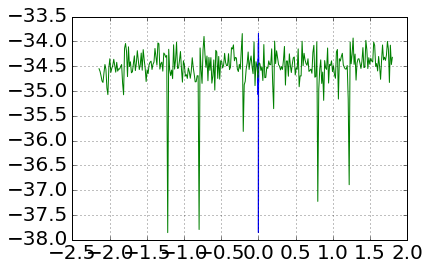

In [14]:
plt.plot(data3[1][0], data3[1][2][:,250])
dips = data3[1][0][data3[1][2][:,250]<-36]
l, r = dips[0], dips[-1]
ys, bins = histogram(dips, 100)
xs = ((bins[:-1]+bins[1:])/2)[ys>0]
Φ_0 = (xs[2]-xs[0])/2
plt.plot((data3[1][0]-(l+r)/2)/Φ_0, data3[1][2][:,250])
plt.grid()

## Антикроссинг

In [90]:
with open("fitting_data/xmons-first-try-2nd-res-anticrossing-high-_res.pkl", "rb") as f:
    data = pickle.load(f)

(5.7, 5.8)

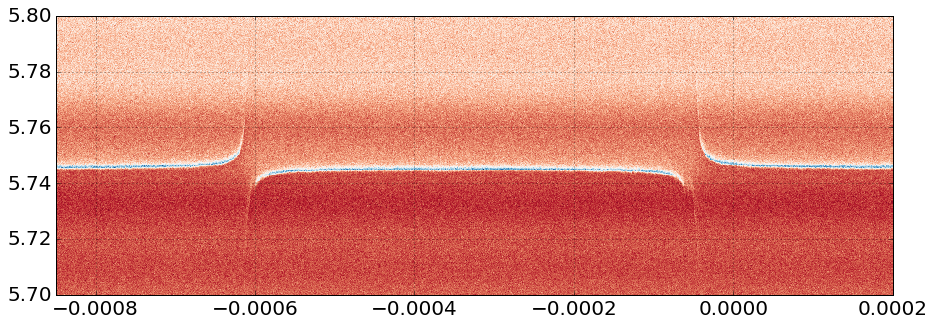

In [5]:
plt.pcolormesh(data[1][0], data[1][1]/1e9, data[1][2].T, cmap='RdBu_r')
plt.gcf().set_size_inches(15,5)
gca().axis('tight')
plt.grid()
plt.ylim(5.7,5.8)

In [101]:
data[1][1][data[1][2][0]<-37]

array([  5.74564565e+09,   5.74594595e+09,   5.74624625e+09])

In [104]:
data[1][1][495]/1e9

5.7486486489999997

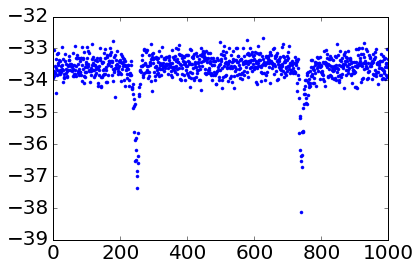

In [109]:
plt.plot(data[1][2][:,475], '.')

Center: -0.000327627627628


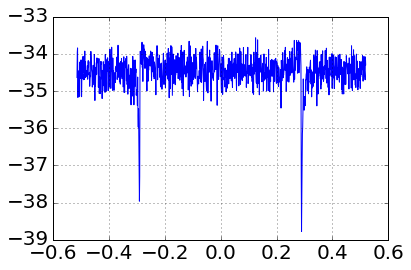

In [113]:
centers = []
for slice_n in range(475, 500):
    l, r = data[1][0][data[1][2][:,slice_n]<-37][0], data[1][0][data[1][2][:,slice_n]<-37][-1]
    centers.append(l/2+r/2)

print("Center:", l/2+r/2)
plt.plot((data[1][0]-mean(centers))/Φ_0, data[1][2][:,500])
plt.grid()

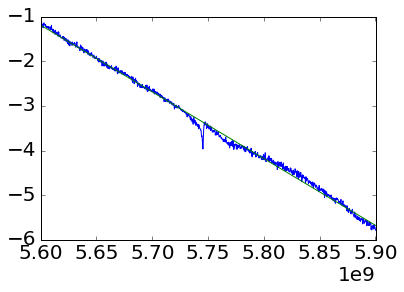

In [170]:
plt.plot(data[1][1], unwrap(data[1][3][0]))
a, b = polyfit(data[1][1], unwrap(data[1][3][0]), 1)
plt.plot(data[1][1], data[1][1]*a+b)
# plt.plot(savgol_filter(data[1][3][0], 51, 3))

In [173]:
with open("fitting_data/xmons-first-try-2nd-res-anticrossing-high-res-calibrated.pkl", "wb") as f:
    pickle.dump(((data[1][0]-(l+r)/2)/Φ_0, data[1][1], data[1][2]-savgol_filter(data[1][2][0], 101, 3), unwrap(data[1][3])-data[1][1]*a+b), f)

## Двухтоновый спектр 

In [240]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_bigger_zone.pkl", "rb") as f:
    data2 = pickle.load(f)

In [241]:
data2[1][1][150]/1e9

5.7515030060120242

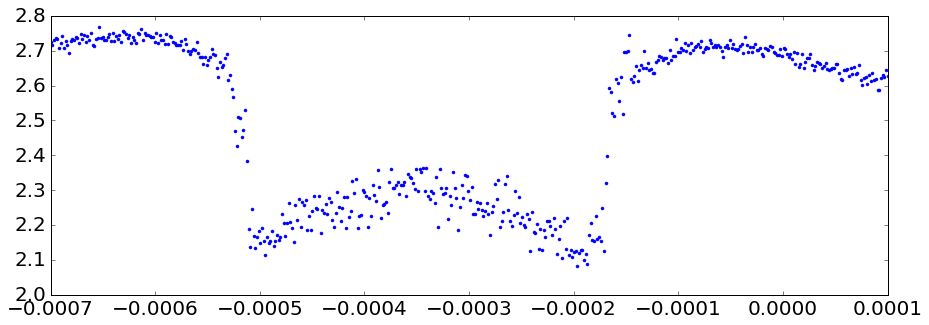

In [243]:
plt.plot(data2[1][0], data2[1][4][:, 150], ".")
mask = logical_and(data2[1][4][:, 150]>2.35, data2[1][4][:, 150]<2.4)
walls = data2[1][0][mask]
l, r = walls[0], walls[-1]
gcf().set_size_inches(15,5)

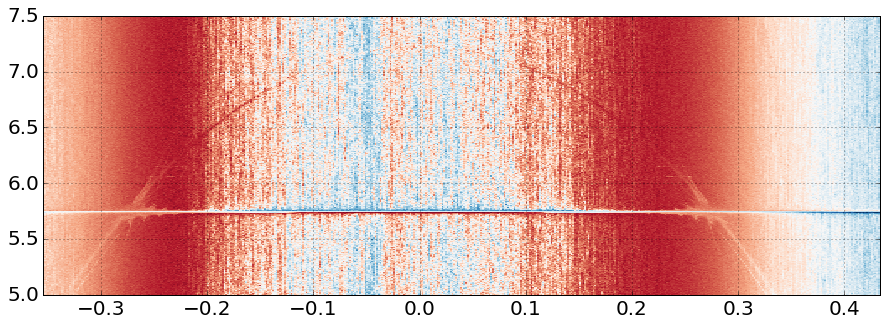

In [220]:
plt.pcolormesh((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1]/1e9, data2[1][4].T, cmap='RdBu_r')
plt.gcf().set_size_inches(15,5)
gca().axis('tight')
plt.grid()
# plt.ylim(5.5,6)

In [223]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_bigger_zone-calibrated.pkl", "wb") as f:
    pickle.dump(((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1], data2[1][3], data2[1][4]), f)

## Двухтоновый спектр с 0-2/2

In [7]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_high_power.pkl", "rb") as f:
    data2 = pickle.load(f)

In [8]:
data2[1][1][75]/1e9

5.7530120481927707

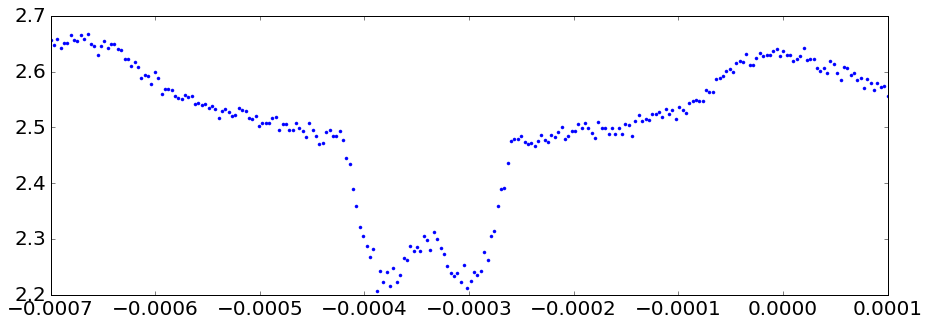

In [16]:
plt.plot(data2[1][0], data2[1][4][:, 75], ".")
mask = logical_and(data2[1][4][:, 75]>2.35, data2[1][4][:, 75]<2.4)
walls = data2[1][0][mask]
l, r = walls[0], walls[-1]
gcf().set_size_inches(15,5)

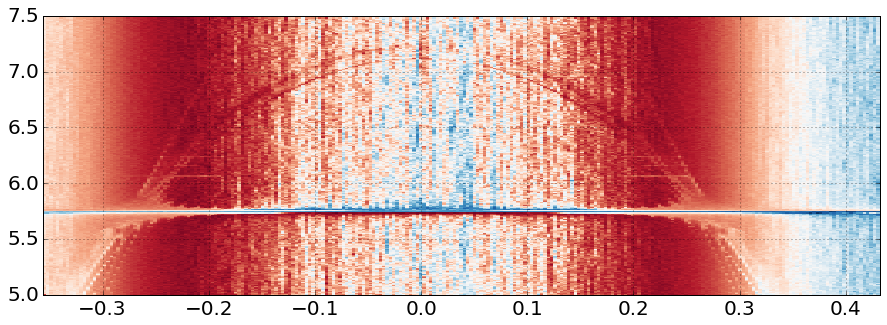

In [17]:
plt.pcolormesh((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1]/1e9, data2[1][4].T, cmap='RdBu_r')
plt.gcf().set_size_inches(15,5)
gca().axis('tight')
plt.grid()
# plt.ylim(5.5,6)

In [248]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_high_power-calibrated.pkl", "wb") as f:
    pickle.dump(((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1], data2[1][3], data2[1][4]), f)

## Зум двухтонового спектра 

In [20]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_-10dBm_upper_zone.pkl", "rb") as f:
    data2 = pickle.load(f)

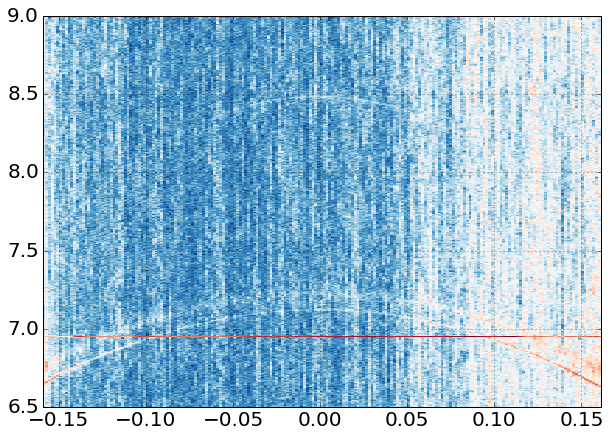

In [23]:
plt.pcolormesh((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1]/1e9, data2[1][3].T, cmap='RdBu_r')
plt.gcf().set_size_inches(10,7)
gca().axis('tight')
plt.grid()
# plt.ylim(5.5,6)

In [24]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_-10dBm_upper_zone-calibrated.pkl", "wb") as f:
    pickle.dump(((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1], data2[1][3], data2[1][4]), f)

## Massive multiphoton  sidebands

In [177]:
with open("fitting_data/xmons-first-try-1st-res-2tone.pkl", "rb") as f:
    data4 = pickle.load(f)

(-0.001, 0.0, 4.0, 5.5)

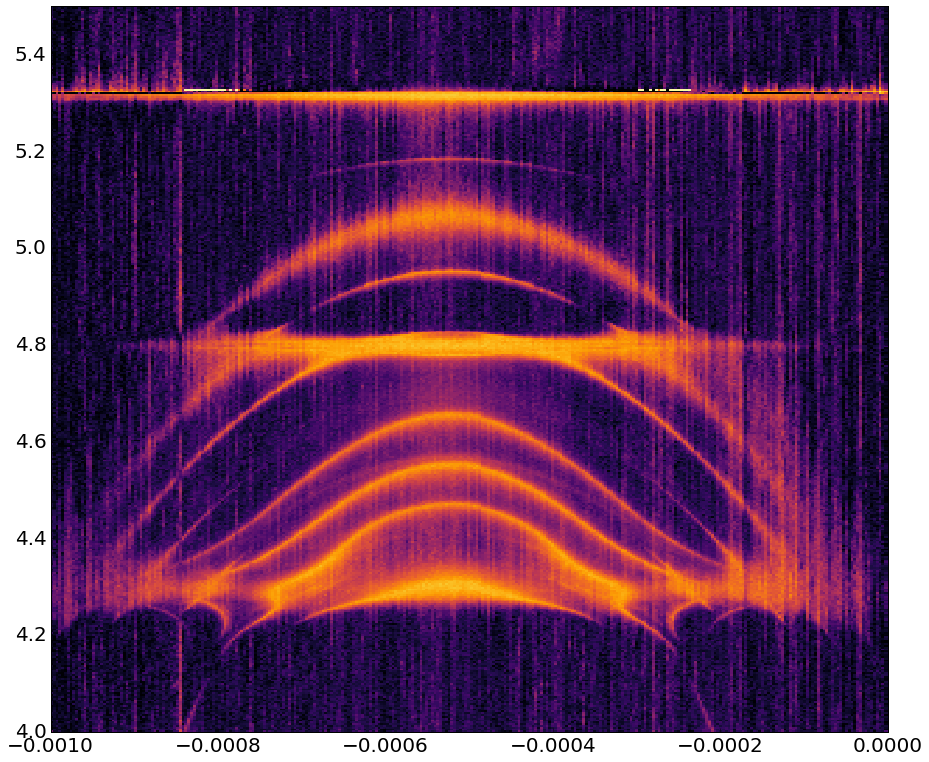

In [141]:
plt.pcolormesh(data2[1][0], data2[1][1]/1e9, data2[1][3].T, cmap='inferno', vmax=-33, vmin=-38)
plt.gcf().set_size_inches(15,13)
gca().axis('tight')
# plt.colorbar()
# plt.ylim(5.5,6)